<a href="https://colab.research.google.com/github/keane13/Recommended-System-Amazon-Product/blob/main/Recomendation_System_Amazon_Product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recomendation System Produk Amazon


### 1. Data Extraction

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics

In [ ]:
data = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [ ]:
data.head(15)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-20T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2017-11-02T17:33:31.000Z,NaN,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2018-04-24T00:00:00.000Z,NaN,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
5,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,Amazon,B00ZV9PXP2,2016-12-14T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",False,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This make an excellent ebook reader. Don't exp...,Good ebook,rmwarriors,https://www.newegg.com/Product/Product.aspx%25...
6,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [ ]:
datas=data[['id','primaryCategories','name','asins','reviews.rating','reviews.text']]

In [ ]:
datas.head()

,id,primaryCategories,name,asins,reviews.rating,reviews.text
0,AVqVGZNvQMlgsOJE6eUY,Electronics,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,3,I thought it would be as big as small paper bu...
1,AVqVGZNvQMlgsOJE6eUY,Electronics,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,5,This kindle is light and easy to use especiall...
2,AVqVGZNvQMlgsOJE6eUY,Electronics,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,4,Didnt know how much i'd use a kindle so went f...
3,AVqVGZNvQMlgsOJE6eUY,Electronics,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,5,I am 100 happy with my purchase. I caught it o...
4,AVqVGZNvQMlgsOJE6eUY,Electronics,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,5,Solid entry level Kindle. Great for kids. Gift...


In [ ]:
datas.shape

(5000, 6)

In [ ]:
datas.isna().sum()

id                   0
primaryCategories    0
name                 0
asins                0
reviews.rating       0
reviews.text         0
dtype: int64

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5000 non-null   object
 1   categories      5000 non-null   object
 2   name            5000 non-null   object
 3   asins           5000 non-null   object
 4   reviews.rating  5000 non-null   int64 
 5   reviews.text    5000 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [ ]:
datas.describe()

,reviews.rating
count,5000.000000
mean,4.596800
std,0.731804
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## 2. EDA 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


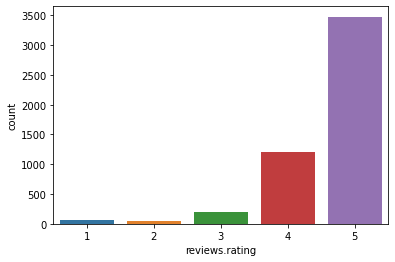

In [ ]:
sn.countplot(datas["reviews.rating"]) #count every score

In [ ]:

datas['reviews.rating'].value_counts()

5    3478
4    1208
3     197
1      63
2      54
Name: reviews.rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


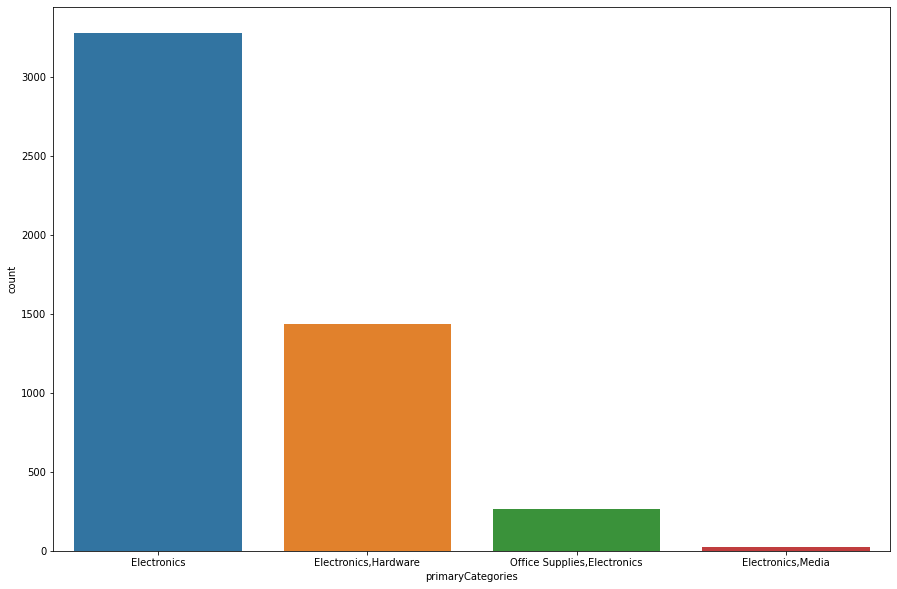

In [ ]:
plt.figure(figsize=[15,10])
sn.countplot(datas["primaryCategories"])

In [ ]:
datas['asins'].value_counts()

B01AHB9CN2    334
B010CEHQTG    262
B06XB29FPF    248
B018Y22C2Y    227
B018Y225IA    182
B018Y22BI4    142
B01BH83OOM     89
B018Y23MNM     71
B01J24C0TI     68
B017JG41PC     51
B0189XYY0Q     44
B00ZV9PXP2     42
B00IOY8XWQ     38
B018Y224PY     38
B01AHBDCKQ     34
B01ACEKAJY     26
B01AHB9C1E     20
B01AHBBG04     19
B01AHB9CYG     19
B00REQKWGA     12
B00VINDBJK     11
B00IOYAM4I     11
B00QFQRELG     10
B01N32NCPM      2
Name: asins, dtype: int64

In [ ]:
datas['primaryCategories'].value_counts()

Electronics                    3276
Electronics,Hardware           1435
Office Supplies,Electronics     265
Electronics,Media                24
Name: primaryCategories, dtype: int64

## 3. Data Preprocessing

In [ ]:
data.duplicated().sum()

95

In [ ]:
data=data.drop_duplicates()

In [ ]:
datas.isna().sum()

id                   0
primaryCategories    0
name                 0
asins                0
reviews.rating       0
reviews.text         0
dtype: int64

###  Colaborative Filtering 2

In [ ]:
from scipy.spatial.distance import cosine

In [ ]:
dfm = datas.pivot_table(values='reviews.rating', index='id', columns='asins', fill_value=0)
dfm.head()

asins,B00IOY8XWQ,B00IOYAM4I,B00QFQRELG,B00REQKWGA,B00VINDBJK,B00ZV9PXP2,B010CEHQTG,B017JG41PC,B0189XYY0Q,B018Y224PY,B018Y225IA,B018Y22BI4,B018Y22C2Y,B018Y23MNM,B01ACEKAJY,B01AHB9C1E,B01AHB9CN2,B01AHB9CYG,B01AHBBG04,B01AHBDCKQ,B01BH83OOM,B01J24C0TI,B01N32NCPM,B06XB29FPF
id,,,,,,,,,,,,,,,,,,,,,,,,
AV-XeQLWuC1rwyj_gbP5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5,0.0
AVpfIfGA1cnluZ0-emyp,0.0,0.000000,4.863636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0.0
AVpfpK8KLJeJML43BCuD,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.506667,0.0,0,0.0
AVpftoij1cnluZ0-p5n2,0.0,4.818182,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0.0
AVpgdkC8ilAPnD_xsvyi,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.460916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0.0


In [ ]:
X = dfm.T

In [ ]:
X.head()

id,AV-XeQLWuC1rwyj_gbP5,AVpfIfGA1cnluZ0-emyp,AVpfpK8KLJeJML43BCuD,AVpftoij1cnluZ0-p5n2,AVpgdkC8ilAPnD_xsvyi,AVph0EeEilAPnD_x9myq,AVphPmHuilAPnD_x3E5h,AVpidLjVilAPnD_xEVpI,AVpjEN4jLJeJML43rpUe,AVqVGWLKnnc1JgDc3jF1,AVqVGZN9QMlgsOJE6eUZ,AVqVGZNvQMlgsOJE6eUY,AVqVGZO3nnc1JgDc3jGK,AVqVGZSEQMlgsOJE6eUc,AVqkIdZiv8e3D1O-leaJ,AVqkIh8WQMlgsOJE6fu-,AVqkIh9HQMlgsOJE6fu_,AVqkIhkhv8e3D1O-lebZ,AVqkIhwDv8e3D1O-lebb,AVqkIiKWnnc1JgDc3khH,AVqkIj9snnc1JgDc3khU,AWFUWc8THh53nbDRF6YO,AWK8z0pOIwln0LfXlSxH,AWMjT0WguC1rwyj_rFh3
asins,,,,,,,,,,,,,,,,,,,,,,,,
B00IOY8XWQ,0.0,0.000000,0.0,0.000000,0.0,0.0,4.646341,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00IOYAM4I,0.0,0.000000,0.0,4.818182,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00QFQRELG,0.0,4.863636,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00REQKWGA,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,4.820513,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00VINDBJK,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,4.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=12, random_state=5)

In [ ]:
matrix = SVD.fit_transform(X)

In [ ]:
matrix.shape

(24, 12)

 There are different similarity measures, like correlation Pearson and Cosine Similarity. Here, we will work with both similarity measures. Let’s create the correlation matrix:

In [ ]:
corr_mat = np.corrcoef(matrix)
corr_mat.shape

(24, 24)

Cosine Similarity Matrix

In [ ]:
cosine_mat=cosine_similarity(matrix)
cosine_mat.shape

(24, 24)

In [ ]:
col_idx_cos = dfm.columns.get_loc("B00IOY8XWQ")
cos_specific = cosine_mat[col_idx_cos]
pd.DataFrame({'cos_specific':cos_specific, 'Product': dfm.columns})\
.sort_values('cos_specific', ascending=False)\
.head(10)

,cos_specific,Product
0,1.000000,B00IOY8XWQ
9,0.496218,B018Y224PY
10,0.462775,B018Y225IA
18,0.194506,B01AHBBG04
15,0.184244,B01AHB9C1E
19,0.132826,B01AHBDCKQ
8,0.077455,B0189XYY0Q
6,0.060958,B010CEHQTG
17,0.060696,B01AHB9CYG
3,0.034423,B00REQKWGA


In [ ]:
col_idx = dfm.columns.get_loc("B00QFQRELG")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Product': dfm.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Product
2,1.000000,B00QFQRELG
20,0.552275,B01BH83OOM
15,0.517304,B01AHB9C1E
7,0.392929,B017JG41PC
12,0.382527,B018Y22C2Y
9,0.051749,B018Y224PY
3,-0.008750,B00REQKWGA
0,-0.010296,B00IOY8XWQ
6,-0.012026,B010CEHQTG
18,-0.039434,B01AHBBG04


### 3. Content-based Recomendation

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [ ]:
dt=pd.read_csv('product_reviews_tokped.csv', low_memory=False)

In [ ]:
dt=datas[['reviews.text','name','reviews.rating']]

In [ ]:
dt[dt['reviews.rating'] ==5]

,reviews.text,name,reviews.rating
1,This kindle is light and easy to use especiall...,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",5
3,I am 100 happy with my purchase. I caught it o...,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",5
4,Solid entry level Kindle. Great for kids. Gift...,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",5
5,This make an excellent ebook reader. Don't exp...,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",5
6,"I ordered this for my daughter, as I have the ...","Amazon Kindle E-Reader 6"" Wifi (8th Generation...",5
...,...,...,...
4994,"I love this tablet/kindle. I can access email,...","Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",5
4995,This is a great tablet for the price. Amazon i...,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",5
4996,This tablet is the perfect size and so easy to...,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",5
4998,I had some thoughts about getting this for a 5...,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",5


In [ ]:
tfidf = TfidfVectorizer(stop_words=stopwordss)

In [ ]:
import re
import string

In [ ]:
from stop_words import get_stop_words

stopwordss = get_stop_words('english')


In [ ]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
dt['reviews.text'] = dt['reviews.text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# Removing special characters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dt=dt.reset_index()

In [ ]:
dt['name']

0       Amazon Kindle E-Reader 6" Wifi (8th Generation...
1       Amazon Kindle E-Reader 6" Wifi (8th Generation...
2       Amazon Kindle E-Reader 6" Wifi (8th Generation...
3       Amazon Kindle E-Reader 6" Wifi (8th Generation...
4       Amazon Kindle E-Reader 6" Wifi (8th Generation...
                              ...                        
4995    Fire Tablet with Alexa, 7" Display, 16 GB, Mag...
4996    Fire Tablet with Alexa, 7" Display, 16 GB, Mag...
4997    Fire Tablet with Alexa, 7" Display, 16 GB, Mag...
4998    Fire Tablet with Alexa, 7" Display, 16 GB, Mag...
4999    Fire Tablet with Alexa, 7" Display, 16 GB, Mag...
Name: name, Length: 4905, dtype: object

In [ ]:
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=00c04d5f3338980ef8a208abf59dc2bc460c22bff9a33300e879d0135d0b8d02
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
overview_matrix = tfidf.fit_transform(dt['reviews.text'])
#Output the shape of tfidf_matrix
overview_matrix.shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


(4905, 5116)

In [ ]:
similarity_matrix = linear_kernel(overview_matrix,overview_matrix)
similarity_matrix

array([[1.        , 0.03833203, 0.02289233, ..., 0.        , 0.        ,
        0.        ],
       [0.03833203, 1.        , 0.07769981, ..., 0.        , 0.        ,
        0.        ],
       [0.02289233, 0.07769981, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#movies index mapping
mapping = pd.Series(dt.index,index = dt['name'])
mapping

name
Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)                          0
Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)                          1
Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)                          2
Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)                          3
Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)                          4
                                                                            ... 
Fire Tablet with Alexa, 7" Display, 16 GB, Magenta - with Special Offers    4995
Fire Tablet with Alexa, 7" Display, 16 GB, Magenta - with Special Offers    4996
Fire Tablet with Alexa, 7" Display, 16 GB, Magenta - with Special Offers    4997
Fire Tablet with Alexa, 7" Display, 16 GB, Magenta - with Special Offers    4998
Fire Tablet with Alexa, 7" Display, 16 GB, Magenta - with Special Offers    4999
Length: 4905, dtype: int64

In [ ]:
dt['name'].unique()

array(['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)',
       'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue',
       'Amazon Tap - Alexa-Enabled Portable Bluetooth Spe

In [ ]:
def recommend_product(inputs):
    dt_indes = mapping[inputs]
#get similarity values with other movies
#similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(similarity_matrix[dt_indes]))
#sort in descending order the similarity score of movie inputted with all the other movies
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
# Get the scores of the 15 most similar movies. Ignore the first movie.
    similarity_score = similarity_score[1:15]
#return movie names using the mapping series
    indices = [i[0] for i in similarity_score]
    return (dt['name'].iloc[indices])

In [ ]:
print('Rekomendasi Produk berdasarkan review untuk produk : Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black ')
recommend_product('Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)')

Rekomendasi Produk berdasarkan review untuk produk : Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black 


ValueError: ignored

### 4. Learning Rank

In [ ]:
!pip install lightfm

     |████████████████████████████████| 310 kB 7.9 MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705351 sha256=a92223e56fef764508c6d94c5ea74ef8165edb961bc13d36285ba31574831e68
  Stored in directory: /root/.cache/pip/wheels/f8/56/28/5772a3bd3413d65f03aa452190b00898b680b10028a1021914
Successfully built lightfm


In [ ]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

In [ ]:
train_precision = precision_at_k(model, train, k=5).mean()


In [ ]:
test_precision = precision_at_k(model, test, k=5).mean()

In [ ]:
train_auc = auc_score(model, train).mean()

In [ ]:
train_auc

0.99313504

In [ ]:
train_precision

0.2

In [ ]:
!pip install recsys

     |████████████████████████████████| 1.4 MB 6.6 MB/s 
  Created wheel for recsys: filename=recsys-0.0.4-cp37-cp37m-linux_x86_64.whl size=750745 sha256=892535a2885dafed9d7c3a361ae0b0e61fe2541249d1d3b3a51dafc08fc12413
  Stored in directory: /root/.cache/pip/wheels/26/12/83/61b5f75590ea53e746469255bc414104fadac60c3dcb4f9246
Successfully built recsys


In [ ]:
!pip install IPython

In [ ]:
pip install import_from_github_com

In [ ]:
import sys



In [ ]:
import importlib.util

In [ ]:
spec=importlib.util.spec_from_file_location("generic_preprocessing","generic_preprocessing.py")

In [ ]:
spec2=importlib.util.spec_from_file_location("recsys","recsys.py")

In [ ]:

foo2 = importlib.util.module_from_spec(spec2)

foo = importlib.util.module_from_spec(spec)


In [ ]:
spec2.loader.exec_module(foo2)
spec.loader.exec_module(foo)


In [ ]:
interactions = foo2.create_interaction_matrix(df = datas,
                                         user_col = 'id',
                                         item_col = 'asins',
                                         rating_col = 'reviews.rating')
interactions.head()


asins,B00IOY8XWQ,B00IOYAM4I,B00QFQRELG,B00REQKWGA,B00VINDBJK,B00ZV9PXP2,B010CEHQTG,B017JG41PC,B0189XYY0Q,B018Y224PY,B018Y225IA,B018Y22BI4,B018Y22C2Y,B018Y23MNM,B01ACEKAJY,B01AHB9C1E,B01AHB9CN2,B01AHB9CYG,B01AHBBG04,B01AHBDCKQ,B01BH83OOM,B01J24C0TI,B01N32NCPM,B06XB29FPF
id,,,,,,,,,,,,,,,,,,,,,,,,
AV-XeQLWuC1rwyj_gbP5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0
AVpfIfGA1cnluZ0-emyp,0.0,0.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfpK8KLJeJML43BCuD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1014.0,0.0,0.0,0.0
AVpftoij1cnluZ0-p5n2,0.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpgdkC8ilAPnD_xsvyi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1655.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mf_model = foo2.runMF(interactions = interactions,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)


In [ ]:
user_dict = foo2.create_user_dict(interactions=interactions)
# Create Item dict
produk_dict = foo2.create_item_dict(df = datas,
                               id_col = 'asins',
                               name_col = 'name')

In [ ]:
rec_list = foo2.sample_recommendation_user(model = mf_model, 
                                      interactions = interactions, 
                                      user_id = 'AV-XeQLWuC1rwyj_gbP5', 
                                      user_dict = user_dict,
                                      item_dict = produk_dict, 
                                      threshold = 4,
                                      nrec_items = 10,
                                      show = True)

Known Likes:
1- Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player

 Recommended Items:
1- Fire HD 8 Tablet with Alexa, 8" HD Display, 32 GB, Tangerine - with Special Offers
2- Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers
3- Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case
4- Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)
5- All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta
6- All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black
7- All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue
8- Kindle Oasis E-reader with Leather Charging Cover - Black, 6" High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers
9- Amazon - Echo Plus w/ Built-In Hub - Silver
10- Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders


In [ ]:
foo2.sample_recommendation_item(model = mf_model,
                           interactions = interactions,
                           item_id = 'B00IOY8XWQ',
                           user_dict = user_dict,
                           item_dict = produk_dict,
                           number_of_user = 15,
                           )

['AVphPmHuilAPnD_x3E5h',
 'AVqkIhkhv8e3D1O-lebZ',
 'AVpftoij1cnluZ0-p5n2',
 'AVpidLjVilAPnD_xEVpI',
 'AVqVGZN9QMlgsOJE6eUZ',
 'AVpjEN4jLJeJML43rpUe',
 'AVph0EeEilAPnD_x9myq',
 'AWMjT0WguC1rwyj_rFh3',
 'AWFUWc8THh53nbDRF6YO',
 'AVpfIfGA1cnluZ0-emyp',
 'AVqkIh8WQMlgsOJE6fu-',
 'AVqkIdZiv8e3D1O-leaJ',
 'AVqkIh9HQMlgsOJE6fu_',
 'AV-XeQLWuC1rwyj_gbP5',
 'AVqVGZSEQMlgsOJE6eUc']

In [ ]:
item_item_dist = foo2.create_item_emdedding_distance_matrix(model = mf_model,
                                                       interactions = interactions)
## Checking item embedding distance matrix
item_item_dist.head()

asins,B00IOY8XWQ,B00IOYAM4I,B00QFQRELG,B00REQKWGA,B00VINDBJK,B00ZV9PXP2,B010CEHQTG,B017JG41PC,B0189XYY0Q,B018Y224PY,B018Y225IA,B018Y22BI4,B018Y22C2Y,B018Y23MNM,B01ACEKAJY,B01AHB9C1E,B01AHB9CN2,B01AHB9CYG,B01AHBBG04,B01AHBDCKQ,B01BH83OOM,B01J24C0TI,B01N32NCPM,B06XB29FPF
asins,,,,,,,,,,,,,,,,,,,,,,,,
B00IOY8XWQ,1.000000,0.334745,-0.043251,0.176629,-0.191000,-0.183155,-0.000549,-0.143181,0.302192,-0.049025,0.053764,-0.219229,0.090193,-0.227090,-0.059385,-0.201571,-0.331672,-0.274152,0.413509,-0.136849,-0.139619,-0.097452,-0.110190,0.075482
B00IOYAM4I,0.334745,1.000000,0.210439,-0.519197,-0.174009,0.054565,0.086791,-0.119692,0.248010,0.018318,-0.268732,0.053995,-0.007209,-0.121140,-0.271081,-0.172736,-0.088910,0.133896,0.141619,-0.099815,-0.106559,-0.089349,-0.033915,-0.218124
B00QFQRELG,-0.043251,0.210439,1.000000,-0.081691,-0.070131,-0.223599,0.006545,0.402527,0.018002,-0.043817,-0.318501,0.059979,-0.370900,-0.026093,-0.044411,-0.353475,0.096794,-0.245704,-0.308312,0.016517,0.255231,0.236411,-0.197730,0.110492
B00REQKWGA,0.176629,-0.519197,-0.081691,1.000000,-0.253526,-0.531522,-0.076445,0.084724,-0.397062,-0.072954,0.158499,-0.009101,0.195170,0.234502,0.171657,0.064522,-0.181760,-0.166728,-0.131602,0.104454,0.227528,-0.009105,0.033153,0.047057
B00VINDBJK,-0.191000,-0.174009,-0.070131,-0.253526,1.000000,0.327805,0.053629,-0.111210,-0.131203,0.277692,-0.141704,-0.039875,-0.111308,-0.269523,-0.183178,0.356155,0.266379,-0.134203,-0.060736,-0.269910,-0.372468,-0.016697,-0.024378,0.176183


In [ ]:
produk_list = foo2.item_item_recommendation(item_emdedding_distance_matrix = item_item_dist,
                                    item_id = 'B00REQKWGA',
                                    item_dict = produk_dict,
                                    n_items = 10)

Item of interest :Kindle Oasis E-reader with Leather Charging Cover - Black, 6" High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers
Item similar to the above item:
1- Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case
2- Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker
3- Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case
4- Amazon - Kindle Voyage - 6" - 4GB - Black
5- All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black
6- Brand New Amazon Kindle Fire 16gb 7" Ips Display Tablet Wifi 16 Gb Blue
7- All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue
8- Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers
9- Fire HD 8 Tablet with Alexa, 8" HD Display, 32 GB, Tangerine - with Special Offers
10- Amazon - Echo Plus w/ Built-In Hub - Silver
